# **Analyse des ventes 2022 : Tableau de bord Power BI** 

**0 - Importation des bibliothèques pour l'analyse de données et la visualisation**

In [68]:
import pyodbc
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine

**1 - Connexion à SQL Server , Chargement et Exploration Initiale des Données**

In [ ]:
# Définir les paramètres de connexion
server = "DESKTOP-2546E\\SQLEXPRESS" # Remplace par le nom de SERVER
database = "POWER_BI" ##

# Connexion via SQLAlchemy
engine = create_engine(f"mssql+pyodbc://{server}/{database}?trusted_connection=yes&driver=ODBC+Driver+17+for+SQL+Server")

# Lire les données de la vue ViewSales
query = "SELECT * FROM ViewSales"
df = pd.read_sql(query, engine)


In [5]:
# Afficher les premières lignes
print(df.head())

   Qty  SellingPrice  TotalSellingPrice  CostPrice  TotalCostPrice  \
0  3.0          19.0               57.0       13.3            39.9   
1  1.0         260.0              260.0      182.0           182.0   
2  1.0         100.0              100.0       70.0            70.0   
3  3.0          22.0               66.0       15.4            46.2   
4  1.0         182.0              182.0      127.4           127.4   

     SaleDate CompanyLocationName UserName      ProductName CategoryName  
0  2022-01-29               PARIS  ALIMATH          Chicken         MEAT  
1  2022-01-29               PARIS  ALIMATH   Chicken strips      CHICKEN  
2  2022-01-29               PARIS  ALIMATH  Chicken pot pie      CHICKEN  
3  2022-01-29               PARIS  ALIMATH  Chicken nuggets      CHICKEN  
4  2022-01-29               PARIS  ALIMATH           Salmon         FISH  


In [33]:
# General Analysis
Sales_Total = df['TotalSellingPrice'].sum()
print(f"Sales Total : {Sales_Total}")
Cost_Total = df['TotalCostPrice'].sum()
print(f"Cost total : {Cost_Total}")
profit = Sales_Total - Cost_Total
print(f"Profit:{profit}")

Sales Total : 95266270.5
Cost total : 66686389.35000002
Profit:28579881.149999984


In [55]:
#Sales by branches
Paris_sales = df[df['CompanyLocationName'] == 'PARIS']['TotalSellingPrice'].sum()
Paris_Percent = (Paris_sales / Sales_Total) * 100 if Sales_Total > 0 else 0
Lagos_sales = df[df['CompanyLocationName']== 'LAGOS']['TotalSellingPrice'].sum()
Lagos_Percent = (Lagos_sales / Sales_Total ) * 100 if Sales_Total > 0 else 0
Accra_sales = df[df['CompanyLocationName'] == 'ACCRA']['TotalSellingPrice'].sum()
Accra_Percent = (Accra_sales / Sales_Total) * 100 if Sales_Total > 0 else 0
COTONOU_sales = df[df['CompanyLocationName'] == 'COTONOU']['TotalSellingPrice'].sum()
COTONOU_Percent = (COTONOU_sales / Sales_Total) * 100 if Sales_Total > 0 else 0
MONROVIA_sales = df[df['CompanyLocationName'] == 'MONROVIA']['TotalSellingPrice'].sum()
MONROVIAU_Percent = (MONROVIA_sales / Sales_Total) * 100 if Sales_Total > 0 else 0
LOME_sales = df[df['CompanyLocationName'] == 'LOME']['TotalSellingPrice'].sum()
LOME_Percent = (LOME_sales / Sales_Total) * 100 if Sales_Total > 0 else 0
ABIDJAN_sales = df[df['CompanyLocationName']== 'ABIDJAN']['TotalSellingPrice'].sum()
ABIDJAN_Percent = (ABIDJAN_sales / Sales_Total) * 100 if Sales_Total > 0 else 0 
DOHA_Sales = df[df['CompanyLocationName'] == 'DOHA']['TotalSellingPrice'].sum()
DOHA_Percent = (DOHA_Sales/Sales_Total) * 100 if Sales_Total > 0 else 0 
NAIROBI_Sales = df[df['CompanyLocationName']=='NAIROBI']['TotalSellingPrice'].sum()
NAIROBI_Percent = (NAIROBI_Sales/Sales_Total)*100 if Sales_Total > 0 else 0

print(f"SALES Total : {Sales_Total:.2f}")
print(f"PARIS Sales : {Paris_sales:.2f} ({Paris_Percent:.2f}%)")
print(f"LAGOS Sales : {Lagos_sales:.2f} ({Lagos_Percent:.2f}%)")
print(f"ACCRA Sales : {Accra_sales:.2f} ({Accra_Percent:.2f}%)")
print(f"COTONOU Sales : {COTONOU_sales:.2f} ({COTONOU_Percent:.2f}%)")
print(f"MONROVIA Sales : {MONROVIA_sales:.2f} ({MONROVIAU_Percent:.2f}%)")
print(f"LOME Sales : {LOME_sales:.2f} ({LOME_Percent:.2f}%)")
print (f"ABIDJAN Sales : {ABIDJAN_sales:.2f} ({ABIDJAN_Percent:.2f}%)")
print (f"DOHA Sales : {DOHA_Sales:.2f} ({DOHA_Percent:.2f}%)")
print (f"NAIROBI Sales : {NAIROBI_Sales:.2f} ({NAIROBI_Percent:.2f}%)")

SALES Total : 95266270.50
PARIS Sales : 24713536.50 (25.94%)
LAGOS Sales : 17709780.00 (18.59%)
ACCRA Sales : 14167469.50 (14.87%)
COTONOU Sales : 12608376.50 (13.23%)
MONROVIA Sales : 10316513.50 (10.83%)
LOME Sales : 4180485.00 (4.39%)
ABIDJAN Sales : 4712862.50 (4.95%)
DOHA Sales : 6763081.50 (7.10%)
NAIROBI Sales : 94165.50 (0.10%)


In [57]:
#branches = df['CompanyLocationName'].dropna().unique()
# Afficher les noms de toutes les colonnes pour identifier celle qui contient les "branches"
#print("Colonnes disponibles :", df.columns)

# Supposons que la colonne s'appelle 'branche' ou quelque chose de similaire
#Remplace 'branche' par le nom exact après avoir vu la liste ci-dessus
branches = df['ProductName'].dropna().unique()

# Afficher toutes les branches uniques
print("Voici les branches disponibles :")
for b in branches:
    print("-", b)

Voici les branches disponibles :
- Chicken
- Chicken strips
- Chicken pot pie
- Chicken nuggets
- Salmon
- Lamb
- Chicken breasts
- Chicken wings
- Chicken tamales
- Chicken bacon
- Turkey
- Chicken drumsticks
- Chicken lasagna
- Chicken thighs
- Carp
- Chicken spring rolls
- Beef
- Chicken deli meat
- Ground chicken
- Tuna
- Chicken liver pate
- Mackerel
- Chicken sausages
- Perch


In [65]:
# Liste des produits à analyser
products = [
    "Chicken", "Chicken strips", "Chicken pot pie", "Chicken nuggets", "Salmon", "Lamb",
    "Chicken breasts", "Chicken wings", "Chicken tamales", "Chicken bacon", "Turkey",
    "Chicken drumsticks", "Chicken lasagna", "Chicken thighs", "Carp", "Chicken spring rolls",
    "Beef", "Chicken deli meat", "Ground chicken", "Tuna", "Chicken liver pate",
    "Mackerel", "Chicken sausages", "Perch"
]

# Calcul des ventes par produit
product_sales = {}

for product in products:
    sales = df[df['ProductName'] == product]['TotalSellingPrice'].sum()
    product_sales[product] = sales

# Trier par ventes décroissantes et prendre le Top 5
top_10 = sorted(product_sales.items(), key=lambda x: x[1], reverse=True)[:10]

# Affichage
print("🔝 Top 10 produits les plus vendus :")
for product, sales in top_10:
    print(f"{product} Sales : {sales:.2f}")


🔝 Top 10 produits les plus vendus :
Chicken nuggets Sales : 14795256.00
Chicken wings Sales : 10203752.50
Chicken tamales Sales : 9409713.00
Chicken Sales : 8427591.00
Salmon Sales : 8279111.00
Chicken deli meat Sales : 8170344.50
Chicken pot pie Sales : 6982888.00
Chicken breasts Sales : 6975270.50
Chicken bacon Sales : 6932676.50
Chicken thighs Sales : 3498834.00


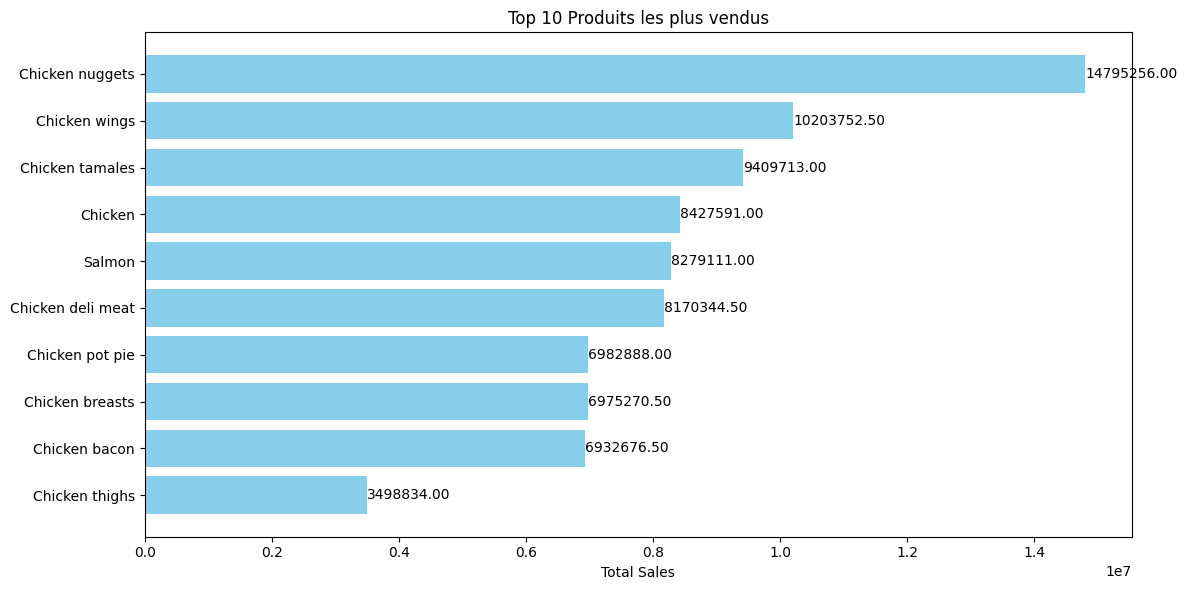

In [69]:
# Séparer noms et valeurs pour le graphique
product_names = [item[0] for item in top_10]
sales_values = [item[1] for item in top_10]

# Création du graphique
plt.figure(figsize=(12, 6))
bars = plt.barh(product_names, sales_values, color='skyblue')
plt.xlabel('Total Sales')
plt.title('Top 10 Produits les plus vendus')
plt.gca().invert_yaxis()  # Inverser pour avoir le produit le plus vendu en haut

# Ajouter les valeurs sur les barres
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2,
             f'{bar.get_width():.2f}', va='center')

plt.tight_layout()
plt.show()
